<div style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
		<div align=center>
			<font face="IranNastaliq" size=30>
				<p></p>
				<p></p>
به نام خدا
				<p></p>
			</font>
			<font color=#FF7500>
دانشگاه صنعتی شریف - دانشکده مهندسی کامپیوتر
            </font>
			<p></p>
			<font color=blue>
آمار و احتمال مهندسی
            </font>
			<br />
			<br />
بهار ۱۴۰۱
		</div>
		<hr/>
		<div align=center>
		    <font color=red size=6>
			    <br />
تمرین عملی چهار
            	<br/>
			</font>
طراحان: یاسمن زلفی موصلو و مهرانه نجفی 
			<br/><br/> 
موعد تحویل: 24 خرداد 
                <br/>
                همفکری در تمامی تمرین‌های درس توصیه می‌شود. در عین حال از شما انتظار می‌رود تمام پیاده‌سازی را به تنهایی و بدون مشاهده کد دیگران انجام دهید.
                <br/><br/>
                <font color=red>
                لطفا در فایل ارسالی تمام بلوک‌های کد اجرا شده و شامل نمودار‌ها و خروجی‌های لازم باشند.
     </font>
                <br/>
        </style>
	</font>
</div>

<div dir = "rtl" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
		<font color=#FF7500 size=6>
            الگوریتم برتر
        </font>
        <hr>
             شرکت آپارات یک الگوریتم جدید (الگوریتم B) برای سیستم توصیه‌گر (recommender system) ویدیو خود توسعه داده است. 
        مسئولان شرکت می‌خواهند بررسی کنند که کارایی الگوریتم جدید در مقایسه با الگوریتم قبلی (الگوریتم A) چگونه است و 
        آیا تفاوت قابل توجهی میان این دو وجود دارد یا خیر. <br/>
        برای این منظور تصمیم گرفتند که برای مدت 15 روز نیمی از ترافیک از الگوریتم جدید و نیم دیگر آن از الگوریتم قبلی استفاده کند و میزان کلیک کاربران بر روی 
        فیلم‌های پیشنهاد شده توسط این دو الگوریتم با یکدیگر مقایسه شود.
        نتایج این آزمون در فایل AB_test.csv آمده است.
    </font>
</div>

<div dir = "rtl" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
             لود کردن داده:
    </font>
</div>

In [1]:
AB_test_data <- read.csv("AB_test.csv", header=TRUE)

<div dir = "rtl" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
             می‌خواهیم به کمک آزمون T تصمیم بگیریم که آیا الگوریتم B را جایگزین الگوریتم A کنیم یا خیر.<br/>
        الف) فرض صفر و فرض یک را معرفی کنید.
    </font>
</div>

فرض صفر:
متوسط تعداد کلیک‌های الگوریتم یک با متوسط تعداد کلیک‌های الکوریتم دو تفاوتی ندارد

فرض یک:
متوسط تعداد کلیک‌های الگوریتم دو بیشتر از متوسط تعداد کلیک‌های الگوریتم یک است

<div dir = "rtl" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
             ب) آزمون T را انجام داده و p-value را به‌دست آورید. با $\alpha = 0.05$ آیا می‌توان گفت الگوریتم B بهتر از A است؟
    </font>
</div>

In [2]:
t.test(clicks_number ~ algorithm, data = AB_test_data, alternative = "less")


	Welch Two Sample t-test

data:  clicks_number by algorithm
t = -1.575, df = 26.373, p-value = 0.06359
alternative hypothesis: true difference in means between group A and group B is less than 0
95 percent confidence interval:
     -Inf 2.361642
sample estimates:
mean in group A mean in group B 
       1029.733        1058.400 


<div dir = "rtl" style="direction:rtl;line-height:100%;">
    مقدار 
    p-value
    برابر با 
    0.06359
    شد که نزدیک است اما نهایتا
خیر با این حد بالا برای 
    p-value
    نمی‌توان گفت الگوریتم جدید بهتر است
</div>

<div dir = "rtl" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
        حال آزمون جایگشت را به گونه‌ای پیاده‌سازی کنید که n مرحله، در هر مرحله یک جایگشت تصادفی از سطرها را در نظر بگیرد و اختلاف دو الگوریتم A و B را به
        دست آورد. P-value را برای این آزمون محاسبه کرده و با حالت قبل مقایسه کنید.
    </font>
</div>

In [3]:
n = 10000
# permutation test implementation
#####

A.clicks <- AB_test_data[AB_test_data$algorithm == 'A',]$clicks_number
B.clicks <- AB_test_data[AB_test_data$algorithm == 'B',]$clicks_number
t_observed <- mean(B.clicks) - mean(A.clicks)
clicks <- c(A.clicks, B.clicks)

sum(replicate(n, {
  shuffled <- sample(clicks)
  mean(shuffled[1:length(B.clicks)]) - mean(shuffled[-(1:length(B.clicks))]) > t_observed
})) / n

[1] 0.0622

In [ ]:
# نتایج دو آزمون بسیار نزدیک‌اند

<div dir = "rtl" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
		<font color=#FF7500 size=6>
            واکسیناسیون
        </font>
        <hr>
             در فایل vaccination.csv اطلاعات مربوط به سن و نوع واکسن تزریق شده به افراد مختلف آمده است.
        گروه سنی افراد را به صورت زیر تعریف می‌کنیم:<br/>
        گروه سنی نوجوان : $12 \leq age < 18$ <br/>
        گروه سنی جوان : $18 \leq age < 40$ <br/>
        گروه سنی بزرگسال : $40 \leq age < 70$ <br/>
        گروه سنی سالمند : $70 \leq age$ <br/>
        نموداری رسم کنید که نشان دهد در هر گروه سنی چند نفر از هر نوع واکسن تزریق کرده‌اند. 
    </font>
</div>

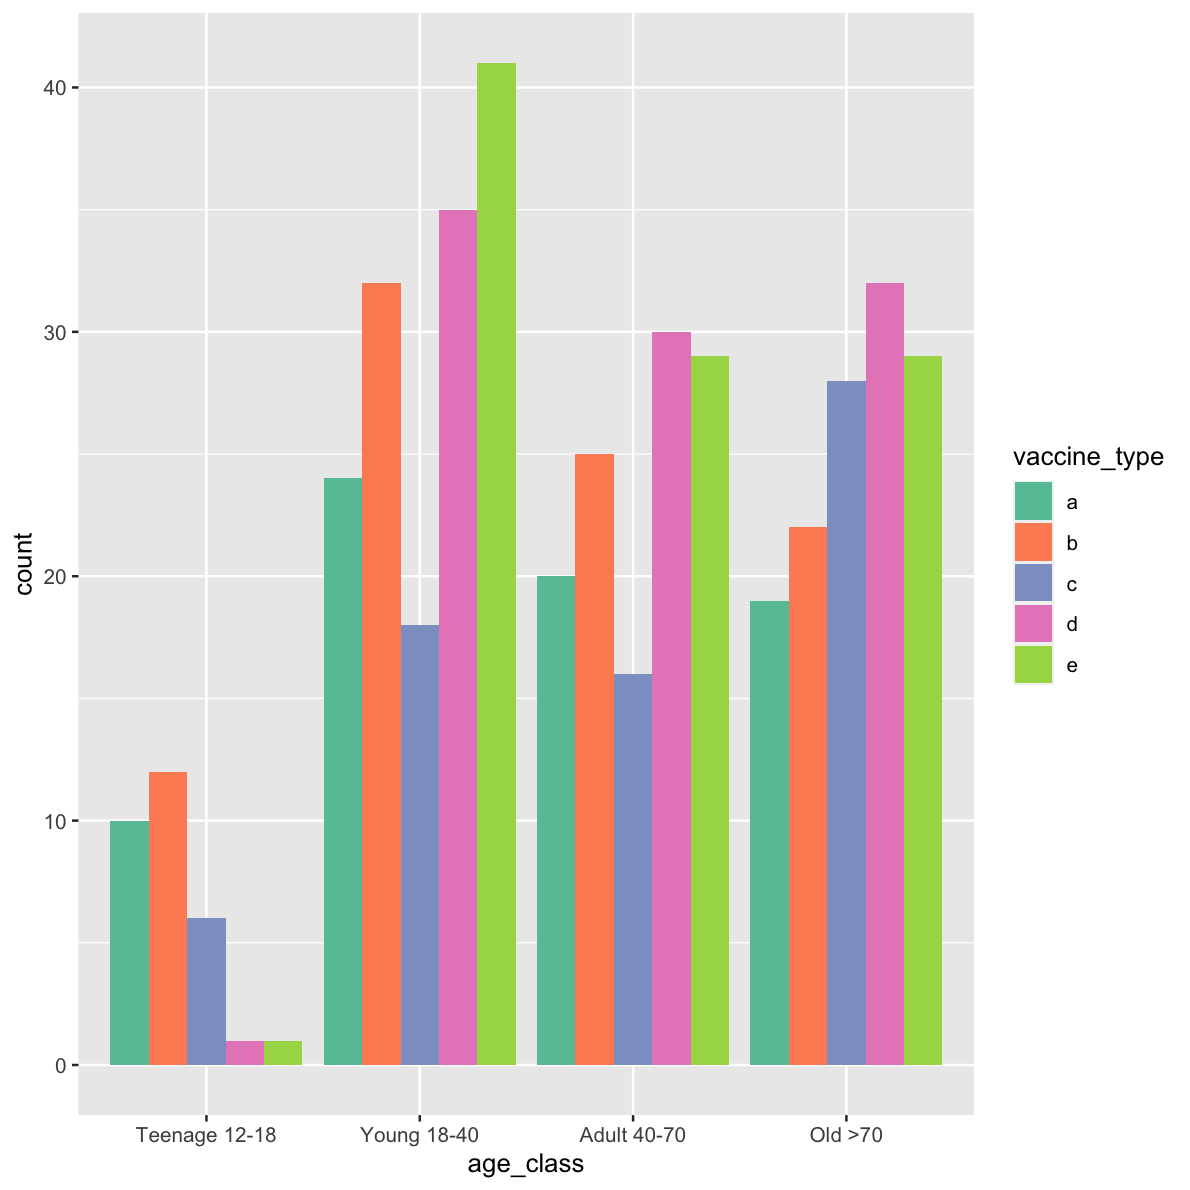

In [4]:
vaccination_data <- read.csv("vaccination.csv", header=TRUE)

library(ggplot2)
options(repr.plot.res = 170)

vaccination_data$age_class <- cut(
  vaccination_data$age, 
  breaks = c(12, 18, 40, 70, Inf),
  labels = c("Teenage 12-18", "Young 18-40", "Adult 40-70", "Old >70"),
  right = FALSE)

ggplot(vaccination_data, aes(x = age_class, fill = vaccine_type)) + 
  geom_bar(position = "dodge")+scale_fill_brewer(palette="Set2")

<div dir = "rtl" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
        به کمک آزمون فرض مناسب بررسی کنید که آیا گروه سنی افراد از نوع واکسن تزریق شده به آنها مستقل است یا خیر.
    </font>
</div>

In [5]:
(my_table <- table(vaccination_data$age_class, vaccination_data$vaccine_type))

fisher.test(my_table, simulate.p.value=TRUE, B=1000000)
# Running without Monte Carlo simulation (exact) will result in low workspace error
# even with workspace=2e8 option

chisq.test(my_table)

               
                 a  b  c  d  e
  Teenage 12-18 10 12  6  1  1
  Young 18-40   24 32 18 35 41
  Adult 40-70   20 25 16 30 29
  Old >70       19 22 28 32 29


	Fisher's Exact Test for Count Data with simulated p-value (based on
	1e+06 replicates)

data:  my_table
p-value = 0.0029
alternative hypothesis: two.sided


Warning message in chisq.test(my_table):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  my_table
X-squared = 27.997, df = 12, p-value = 0.005538


## پاسخ
<div dir = "rtl" style="direction:rtl;line-height:300%;">
هم تست فیشر با یک میلیون نمونه و هم تست
    chi-squared
نشان می‌دهند که مقدار 
p-value
در آن‌ها به ترتیب 
0.0029
و
0.005538
است.
با توجه به این که تعداد نمونه‌های تست فیشر بسیار زیاد است و در آن اعداد بالا تغییر چندانی هم نمی‌کرد
به نظر من جواب تست فیشر حتی با این که دقیق اجرا نشده 
دقیق‌تر است.
به هر حال
p-value
هر دو فوق‌العاده کم است و نشان می‌دهد فرض صفر را به راحتی می‌توان رد کرد.
گروه سنی افراد از نوع واکسن تزریق شده مستقل نیست.
f

<div dir = "rtl" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
		<font color=#FF7500 size=6>
            تخمین‌گرهای واریانس
        </font>
        <hr>
             در این سوال به بررسی دو تخمین‌گر رایج واریانس می‌پردازیم. اولین تخمین‌گر مربوط به MLE است:
    </font>
</div>


$$\hat{\sigma^2} = \frac{1}{n}\sum_{i=1}^{n}(x_i-\bar{x})^2$$


<div dir = "rtl" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
        تخمین‌گر بعدی شامل تصحیح بسل(bessel's correction) می‌باشد:
    </font>
</div>

$$\hat{\sigma^2} = \frac{1}{n-1}\sum_{i=1}^{n}(x_i-\bar{x})^2$$

<div dir = "rtl" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
        <ul>
            <li>
                نمونه‌هایی از یک توزیع 
                Normal(2, 2)
                با اندازه ۲ تا ۱۰۰۰ تولید کرده و برای هر  کدام  بایاس را محاسبه کنید.
            </li>
        </ul>
	</font>
</div>

In [6]:
mu <- 2
s <- 2
size <- 2:1000

# sd <- function(data) sqrt(sum((data - mean(data))^2 / (length(data) - 1)))
bias.sd <- function(l) sd(l) - s
bias.d <- function(l) sd(l) * (length(l) - 1) / length(l) - s

data <- lapply(size, function(i) rnorm(i, mu, s))
bias.bessel <- sapply(data, bias.sd)
bias.mle <- sapply(data, bias.d)

<div dir = "rtl" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
        <ul>
            <li>
                 حال این مقادیر را در نمودار رسم کنید.
            </li>
            <li>
با توجه به این نمودار ها آیا این دو تخمین‌گر سازگار هستند؟
            </li>
        </ul>
	</font>
</div>

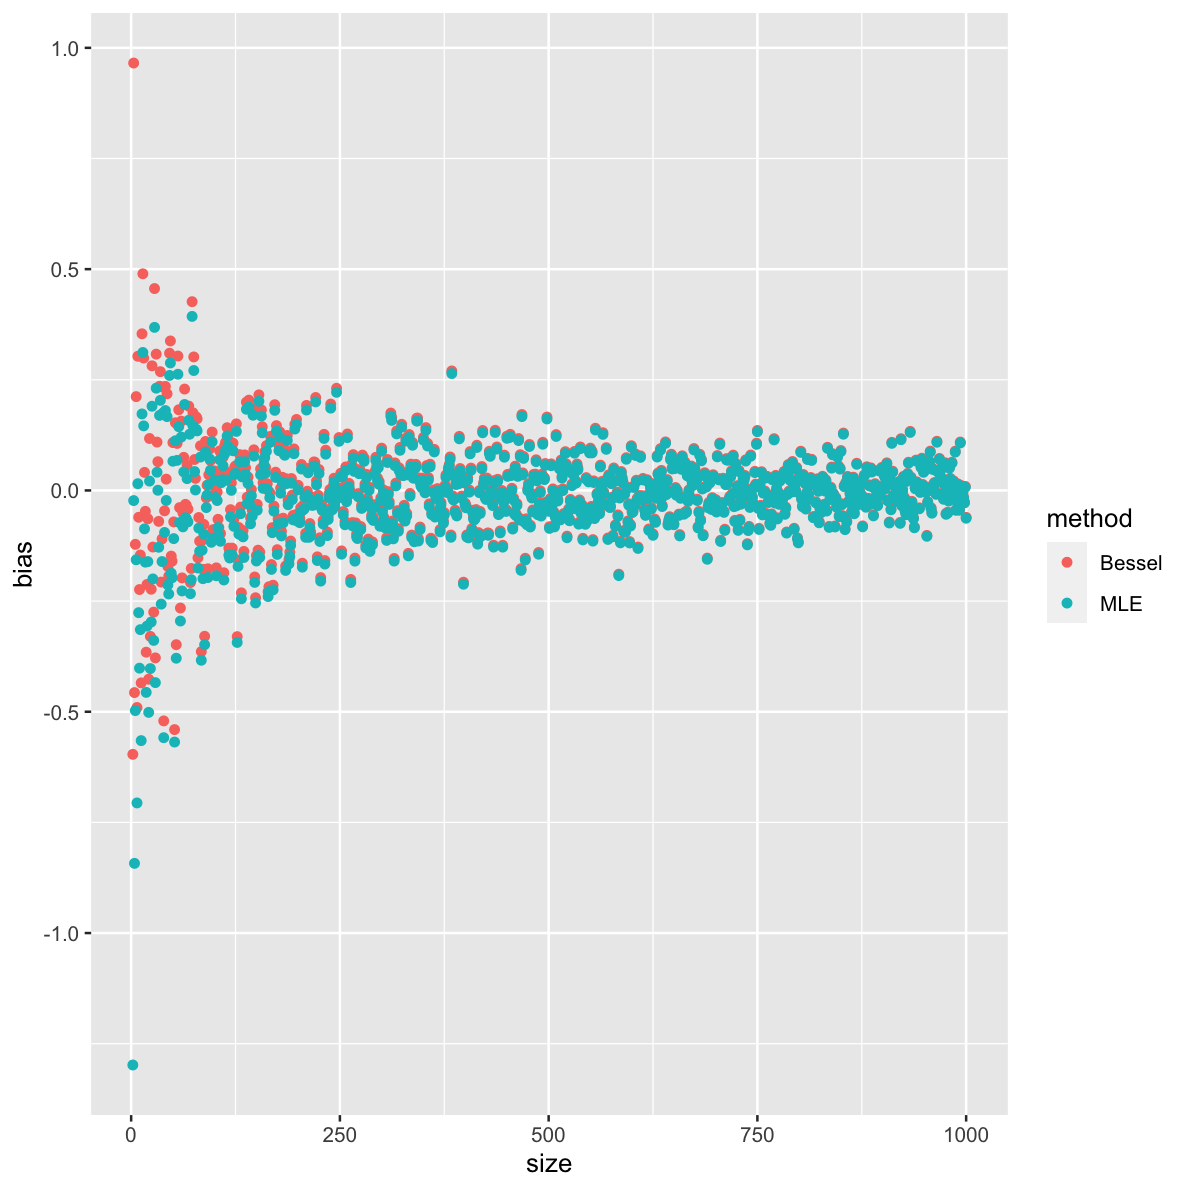

In [7]:
ggplot(rbind(
    data.frame(size=size, bias=bias.bessel, method="Bessel"),
    data.frame(size=size, bias=bias.mle, method="MLE")))+
geom_point(aes(size,bias,colour=method))

<div dir = "rtl" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
		<font color=#FF7500 size=6>
        </font>
        پاسخ:
        بله به نظر می‌آید که هر دو با زیاد شدن 
        sample size
        به مقدار واقعی (یعنی اختلاف صفر با ۲) نزدیک می‌شوند.
	</font>
</div>

<div dir = "rtl" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
        <ul>
            <li>
                 این بار صد هزار نمونه ده‌تایی از همان توزیع تولید کنید و میانگین بایاس را محاسبه کنید.
            </li>
            <li>
                با توجه به این مقادیر آیا این دو تخمین‌گر unbiased هستند؟
            </li>
        </ul>
	</font>
</div>

In [8]:
data <- replicate(100000, rnorm(10, mu, s), simplify=FALSE)

cat('Bessel mean bias = ',
    mean(sapply(data, bias.sd)),
    '\nMLE mean bias = ',
    mean(sapply(data, bias.d)))

Bessel mean bias =  -0.05212393 
MLE mean bias =  -0.2469115

<div dir = "rtl" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
		<font color=#FF7500 size=6>
        </font>
        پاسخ:
        به نظر می‌رسد که تخمین‌گر 
        MLE
        دارای بایاس منفی است (یعنی همیشه کمتر گزارش می‌کند) و تخمین‌گر دارای اصلاح
        Bessel
        بایاس ندارد.
	</font>
</div>